In [3]:
#import necessary packages
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# load data
df = pd.read_csv("train_data.csv")
df.head()
print(df.shape)
print(df.columns)

(5807, 97)
Index(['Index', 'Bankrupt?',
       ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate'

In [5]:
null_counts = df.isnull().sum()
for column, count in null_counts.items():
    if count > 1:
        print(f"{column}: {count}")

There are no null values in our data

In [6]:
# Pearson Correlation calculations
list_to_drop = []
target = 'Bankrupt?'
print("\nPearson Correlations:")
for column in df.columns:
    if column != target:  
        if df[column].isnull().sum() == 0: 
            pearson_corr = df['Bankrupt?'].corr(df[column])
            print(f'Pearson Correlation between {target} and {column}: {pearson_corr:.2f}')
            if abs(pearson_corr) < 0.07:
                list_to_drop.append(column)
        else:
            print(f'Cannot calculate correlation for {column} due to null values')


Pearson Correlations:
Pearson Correlation between Bankrupt? and Index: 0.00
Pearson Correlation between Bankrupt? and  ROA(C) before interest and depreciation before interest: -0.26
Pearson Correlation between Bankrupt? and  ROA(A) before interest and % after tax: -0.28
Pearson Correlation between Bankrupt? and  ROA(B) before interest and depreciation after tax: -0.27
Pearson Correlation between Bankrupt? and  Operating Gross Margin: -0.10
Pearson Correlation between Bankrupt? and  Realized Sales Gross Margin: -0.10
Pearson Correlation between Bankrupt? and  Operating Profit Rate: 0.00
Pearson Correlation between Bankrupt? and  Pre-tax net Interest Rate: -0.01
Pearson Correlation between Bankrupt? and  After-tax net Interest Rate: -0.01
Pearson Correlation between Bankrupt? and  Non-industry income and expenditure/revenue: -0.02
Pearson Correlation between Bankrupt? and  Continuous interest rate (after tax): -0.01
Pearson Correlation between Bankrupt? and  Operating Expense Rate: -0.0

Interpreting the Correlation Values (Pearson correlation)

Close to +1: Strong positive relationship.

Close to -1: Strong negative relationship.

Close to 0: No linear relationship.

Intermediate values: Indicates the degree of linear relationship between variables.

Drop columns that are close to 0 with a threshold of -0.07<x<0.07

In [7]:
t = df[' Net Income Flag']
unique = pd.unique(t)
unique

array([1], dtype=int64)

In [8]:
list_to_drop.append(' Net Income Flag')
list_to_drop

['Index',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Interest-bearing debt interest rate',
 ' Revenue Per Share (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' Continuous Net Profit Growth Rate',
 ' Total Asset Growth Rate',
 ' Net Value Growth Rate',
 ' Total Asset Return Growth Rate Ratio',
 ' Current Ratio',
 ' Quick Ratio',
 ' Interest Expense Ratio',
 ' Total debt/Total net worth',
 ' Long-term fund suitability ratio (A)',
 ' Total Asset Turnover',
 ' Accounts Receivable Turnover',
 ' Average Collection Days',
 ' Inventory Turnover Rate (times)',
 ' Net Worth Turnover Rate (times)',
 ' Revenue per person',
 ' Allocation rate per person',
 ' Current Assets

In [9]:
df = df.drop(columns= list_to_drop)
df.shape

(5807, 46)

In [10]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        
        x = 1
        # Histogram -- commenting out for now
        #plt.figure(figsize=(10, 4))
        #plt.hist(df[column], bins=30, alpha=0.7, color='blue', density=True)
        #plt.title(f'Histogram of {column}')
        #plt.show() 

        # Q-Q plot -- commenting out for now
        #fig, ax = plt.subplots(figsize=(10, 4))
        #stats.probplot(df[column], dist="norm", plot=ax)
        #ax.set_title(f'Q-Q plot of {column}')
        #plt.show() 
    else:
        print(f"Skipped {column}: Not a numeric data type.")


PART 2


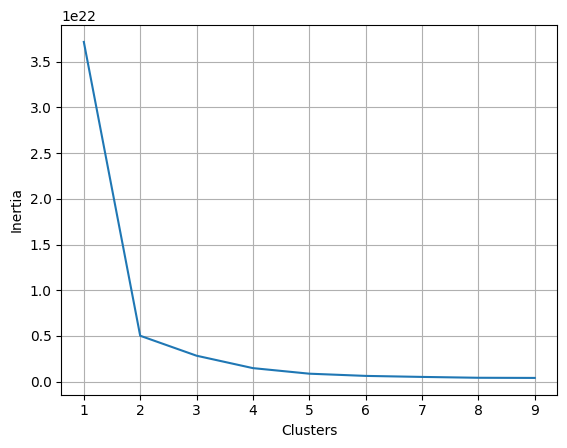

In [11]:
train_X = df.drop(['Bankrupt?'], axis=1)
train_Y = df['Bankrupt?']

inertias = []
for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(train_X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10),inertias)
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

Best cluster is probably 2 but since we have 4 group members we will go with 4

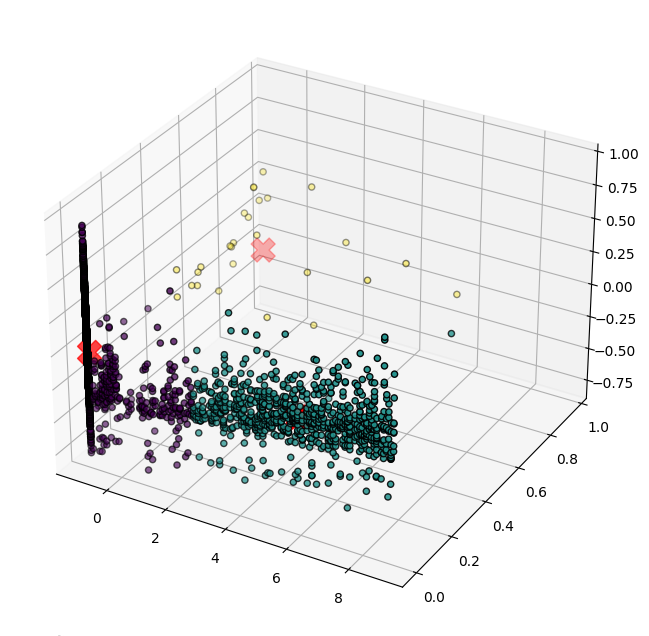

In [12]:
pca = PCA(3).fit_transform(df)
kmeans = KMeans(3)
labels = kmeans.fit_predict(pca)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca[:, 0], pca[:, 1], pca[:, 2], c=labels, cmap='viridis',edgecolor='k')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', s=300, marker='X')
plt.show()

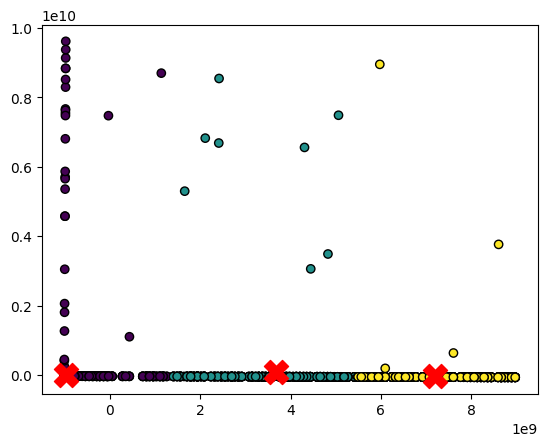

In [13]:
pca = PCA(2).fit_transform(df)
kmeans = KMeans(3)
labels = kmeans.fit_predict(pca)
plt.scatter(pca[:, 0], pca[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=300, marker='X')
plt.show()

The desity of all but one of the clusters is high meaning the varriance within the other 3 is small, and there around 2-10 outliers per cluster. There also seems to be some overlap within clusters which could mean similarites between subgroups. Additionally the yellow cluster center is not on the same line as the other 3 centers which could be companies that can help point in the direction of if a company will go bankrupt.

In [14]:
df['Group'] = labels
df.to_csv('train_data_with_groups.csv', index=False)

In [ ]:
# nyrah 0.9664371772805508 accuracy subgroup 2